In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD


# Carga datos

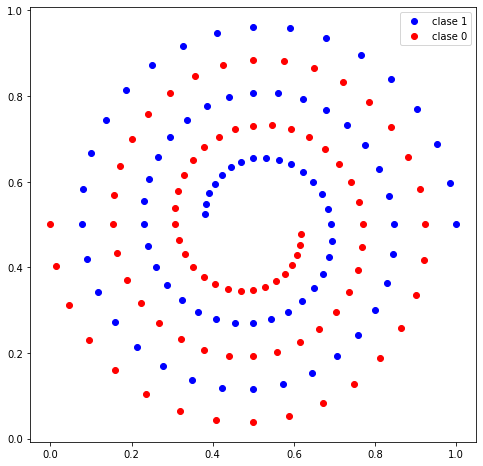

In [2]:
def spiral_xy(i, spiral_num):
    """
    Create the data for a spiral.
    """
    φ = i/16 * math.pi
    r = 6.5 * ((104 - i)/104)
    x = (r * math.cos(φ) * spiral_num)/13 + 0.5
    y = (r * math.sin(φ) * spiral_num)/13 + 0.5
    return (x, y)

def spiral(spiral_num):
    return [spiral_xy(i, spiral_num) for i in range(80)]


a_x = list(zip(*spiral(1)))[0]
a_y = list(zip(*spiral(1)))[1]

b_x = list(zip(*spiral(-1)))[0]
b_y = list(zip(*spiral(-1)))[1]

plt.figure(figsize=(8, 8))

plt.scatter(a_x,a_y, color = 'b', label = 'clase 1')
plt.scatter(b_x,b_y, color = 'r', label = 'clase 0')
plt.legend()
plt.show()

In [3]:
data_class_1 = [[x,y,1] for x,y in spiral(1)]
data_class_0 = [[x,y,0] for x,y in spiral(-1)]
data = data_class_1+data_class_0
data_df =pd.DataFrame(data)
data_df = data_df.sample(frac=1).reset_index(drop=True)
x, y  = data_df.iloc[:,:-1],data_df.iloc[:,-1]


# Entrenamiento

In [6]:
optimizer = keras.optimizers.Adam(lr=0.005)
model = keras.Sequential([
    # the hidden  layers
    layers.Dense(units=50, activation='relu', input_shape=[2]),
    layers.Dense(units=50, activation='relu'),
    layers.Dense(units=50, activation='relu'),

    # the  output layer 
    layers.Dense(units=1,activation = 'sigmoid'),
])
model.compile(loss='binary_crossentropy',optimizer=optimizer, metrics=['accuracy'])


history = model.fit(
    x,y ,
    batch_size=30,
    epochs=1000,
    verbose=1, # hide the output because we have so many epochs
)


Epoch 1/1000


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6/6 [==============================] - 1s 3ms/step - loss: 0.6969 - accuracy: 0.4625
Epoch 2/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.4250
Epoch 3/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5375
Epoch 4/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.5375
Epoch 5/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.5312
Epoch 6/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.5437
Epoch 7/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.5250
Epoch 8/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.5437
Epoch 9/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.5625
Epoch 10/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.6839 - accuracy: 0.5688
Epoch 11/1000
6/6 [=============

El siguiente enlace es muy interesante, deja crear redes neuronales interactivamente y ver los resultados.

http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.73263&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=true&cosY=false&sinY=true&collectStats=false&problem=classification&initZero=false&hideText=false
